In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
RANDOM_STATE = 19 * 103785

In [2]:
from preprocesamiento import obtenerDFHoldout, obtenerDFTraining
from preprocesamiento import preprocesar_data_frame
from preprocesamiento import feature_engineering

## Dataset


In [3]:
GSPREADHSEET_DOWNLOAD_URL = ("https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format)
FIUFIP_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'
df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=FIUFIP_GID), skiprows=0)
df =feature_engineering(df)

In [4]:

X = pd.get_dummies(df[['estado_marital','genero','edad','anios_estudiados','ganancia_perdida_declarada_bolsa_argentina']])

#X = X.drop(['trabajo_No contesto'],axis = 1)
X['ganancia_perdida_declarada_bolsa_argentina'] = X['ganancia_perdida_declarada_bolsa_argentina'].apply(lambda x: np.tanh(x) )
X = X.drop(['genero_mujer'],axis = 1)
X = X.drop(['estado_marital_divorciado'],axis = 1)
X

,edad,anios_estudiados,ganancia_perdida_declarada_bolsa_argentina,estado_marital_matrimonio,estado_marital_pareja_no_presente,estado_marital_separado,estado_marital_sin_matrimonio,estado_marital_viudo_a,genero_hombre
0,39,17,1.0,0,0,0,1,0,1
1,50,17,0.0,1,0,0,0,0,1
2,38,13,0.0,0,0,0,0,0,1
3,53,11,0.0,1,0,0,0,0,1
4,28,17,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
32556,27,16,0.0,1,0,0,0,0,0
32557,40,13,0.0,1,0,0,0,0,1
32558,58,13,0.0,0,0,0,0,1,0
32559,22,13,0.0,0,0,0,1,0,1


In [5]:
X_tsne = TSNE(n_components=2, perplexity=50,n_jobs=-1, verbose=4).fit_transform(X)
x1 = X_tsne[:, 0]
x2 = X_tsne[:, 1]

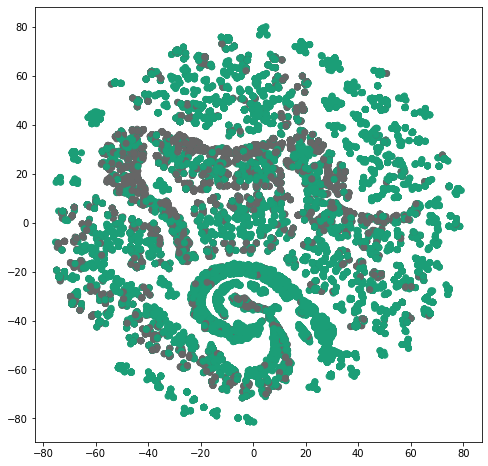

In [6]:
plt.figure(figsize=(8,8))
scatter = plt.scatter(
    x = X_tsne[:, 0],
    y = X_tsne[:, 1],
    c = list(df['tiene_alto_valor_adquisitivo']),
    cmap = plt.cm.get_cmap('Dark2')
    )
    
    